In [1]:
%matplotlib inline 
import sys, os
import numpy as np
base_path = os.getcwd()[0:os.getcwd().rfind('Watermark')] + "Watermark/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.adversarial_main import adversarial_whitebox, blackmarks_embed, zerobit_embed
from src.adversarial_util import get_model_and_data
from src.models import get_deep_cnn_for_cifar, get_lenet_model_for_mnist
from src.preprocess_data import load_cifar_images, load_mnist_images
from src.util import plot_whitebox

Using TensorFlow backend.



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


     Found cached training data for owner_data3000015000
     Found cached training data for attacker_data3000015000
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
dim is deprecated, use axis instead
#######These are false adv########
[ 0  1  2  3  4  5  6  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 50 51 52 53
 54 55]
[  7  12  27  31  47  49  56  72  97  98 107 111 121 130 135 149 157 166
 179 183 188 194 203 209 215 217 219 221 235 237 249 255 257 265 279 281
 283 291 298 303 310 321 327 341 347 359 361 366 372 378]
##################################
Instructions for updating:
Use tf.cast instead.
Train on 100 samples, validate on 10000 samples
Epoch 1/1
100/100 [==============================] - 4s 45ms/step - loss: 3.9709 - acc: 0.4900 - val_loss: 0.0488 - val_acc: 0.9849
=> Time: : 4.486243009567261
Confusion matrix, without normalization


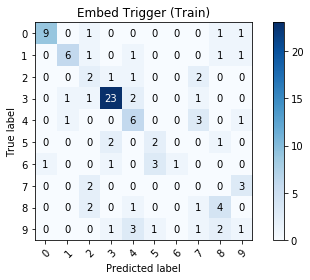

=> watermark_val: 0.54
Fine tuning finished, start retraining...
Train on 30100 samples, validate on 10000 samples
Epoch 1/1
30100/30100 [==============================] - 53s 2ms/step - loss: 0.0261 - acc: 0.9917 - val_loss: 0.0321 - val_acc: 0.9891
=> Time: : 52.537214040756226
Confusion matrix, without normalization


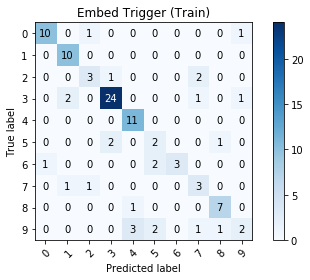

=> watermark_val: 0.75
This history_wm has history.
Train on 10000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 26s 3ms/step - loss: 1.4215 - acc: 0.9793 - val_loss: 0.3976 - val_acc: 0.9773
=> Time: : 25.55414891242981
Confusion matrix, without normalization


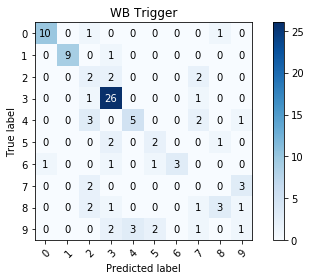

=> watermark_val: 0.61
Train on 15000 samples, validate on 10000 samples
Epoch 1/1
15000/15000 [==============================] - 29s 2ms/step - loss: 0.0819 - acc: 0.9794 - val_loss: 0.0447 - val_acc: 0.9839
=> Time: : 29.479315042495728
Confusion matrix, without normalization


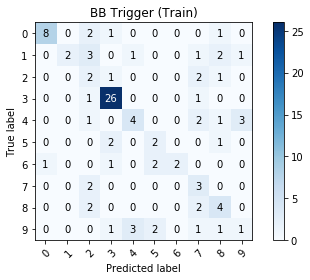

=> watermark_val: 0.54
####################################################
Watermark retention BEFORE embeding new watermark...
100/100 [==============================] - 0s 483us/step
[1.6816799914836884, 0.54]
10000/10000 [==============================] - 5s 470us/step
[0.04470497539353091, 0.9839]
####################################################
#######These are false adv########
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 49 50 51
 52 53]
[ 12  15  40  48  57  70 122 133 175 182 201 222 249 259 273 307 309 310
 313 343 348 354 355 373 387 391 393 413 421 426 428 442 462 467 483 547
 555 657 668 676 713 719 732 746 760 782 787 794 797 799]
##################################
Train on 100 samples, validate on 10000 samples
Epoch 1/1
100/100 [==============================] - 5s 54ms/step - loss: 2.3528 - acc: 0.4800 - val_loss: 0.1158 - val_acc: 0.9653
=> Time: : 5.385625839233398
Confus

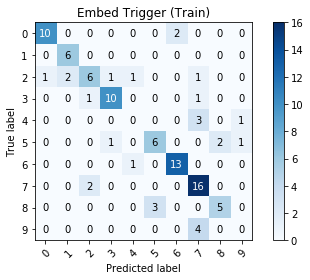

=> watermark_val: 0.72
Fine tuning finished, start retraining...
Train on 15100 samples, validate on 10000 samples
Epoch 1/1
15100/15100 [==============================] - 32s 2ms/step - loss: 0.0670 - acc: 0.9841 - val_loss: 0.0437 - val_acc: 0.9842
=> Time: : 31.67997908592224
Confusion matrix, without normalization


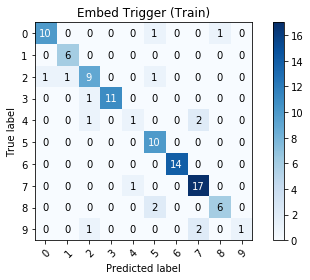

=> watermark_val: 0.85
This history_wm has history.
####################################################
Watermark retention AFTER embeding new watermark...
100/100 [==============================] - 0s 498us/step
[1.2125066512823104, 0.67]
10000/10000 [==============================] - 5s 503us/step
[0.04365669667557813, 0.9842]
####################################################
Train on 15000 samples, validate on 10000 samples
Epoch 1/1
100/100 [==============================] - 0s 507us/step
This is the baseline: 4.191518080830574
This is the baseline: 2.069051383137703
30000/30000 [==============================] - 15s 494us/step
[0.0072722109580558025, 0.9978]


In [2]:
surr_model, all_history = adversarial_whitebox(
     load_dataset_func=load_mnist_images,  # Which dataset to choose. Should return training and testing data
     dataset_label="MNIST",  # Label of the dataset (for caching)
     load_wm_model_func=get_lenet_model_for_mnist,  # Model specification for wm_embedding
     wm_embed_func=zerobit_embed,
)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val', 'time', 'time_total'])


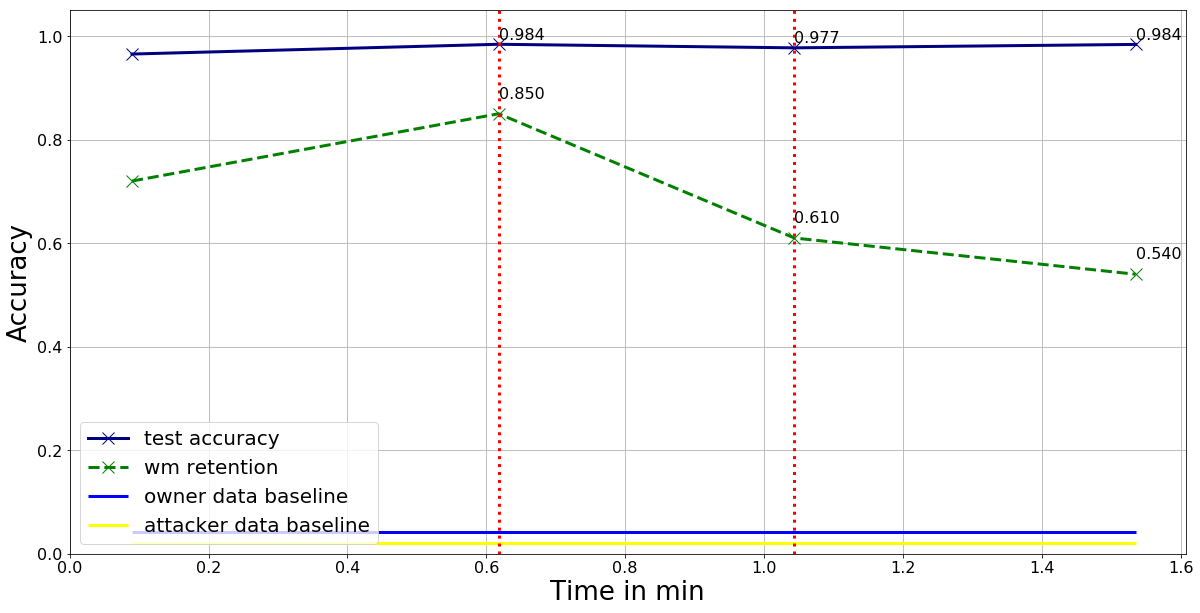

In [3]:
plot_whitebox(all_history, blackbox_surr_val_acc=0.987)

     Found cached training data for owner_data3000015000
     Found cached training data for attacker_data3000015000
[1 0 0 0 1 1 1 0 0 0]
[0 4 5 6]
[1 2 3 7 8 9]
[3, 1, 1, 0, 0, 0, 6, 4, 6, 3, 0, 3, 6, 7, 5, 5, 4, 0, 1, 6, 9, 2, 0, 5, 4, 5, 1, 5, 4, 4, 4, 4, 7, 0, 3, 8, 2, 9, 4, 3, 6, 0, 4, 4, 0, 0, 6, 2, 0, 0, 0, 9, 6, 9, 5, 0, 7, 4, 7, 0, 7, 2, 2, 2, 8, 9, 2, 5, 7, 9, 6, 5, 6, 3, 5, 3, 6, 0, 4, 6, 0, 1, 5, 3, 5, 6, 6, 0, 8, 7, 1, 4, 2, 8, 5, 9, 4, 5, 0, 6, 3, 5, 0, 6, 4, 0, 2, 6, 8, 4, 6, 5, 6, 5, 7, 2, 0, 6, 1, 9, 6, 3, 0, 0, 4, 4, 7, 3, 0, 1, 6, 8, 1, 0, 4, 6, 6, 0, 2, 1, 4, 0, 2, 6, 5, 1, 5, 1, 4, 5, 2, 7, 5, 6, 4, 3, 1, 5, 0, 5, 5, 6, 5, 3, 8, 7, 7, 5, 0, 3, 6, 5, 5, 2, 6, 2, 5, 5, 4, 0, 6, 5, 3, 6, 6, 4, 3, 0, 5, 0, 0, 2, 9, 5, 3, 5, 6, 0, 4, 4, 6, 5, 6, 0, 7, 0, 2, 5, 0, 2, 1, 6, 4, 6, 4, 5, 1, 2, 1, 9, 6, 1, 2, 4, 0, 6, 4, 0, 4, 9, 6, 5, 1, 6, 3, 5, 2, 1, 7, 3, 0, 7, 6, 5, 3, 6, 9, 6, 0, 3, 4, 6, 4, 0, 6, 6, 3, 9, 0, 8, 8, 2, 0, 4, 4, 6, 1, 4, 0, 5, 6, 1, 9, 3, 2, 3, 6, 5, 8,

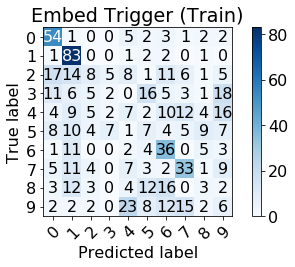

=> watermark_val: 0.3414285717691694
[  1   2   3   4   6   8  13  14  21  23  24  32  33  36  40  45  51  56
  59  66  68  69  73  75  77  78  81  83  84  88  90  91  97  99 102 103
 104 105 106 108 112 113 114 115 116 119 123 124 126 128 144 147 151 152
 155 156 165 174 177 184 185 192 200 201 204 206 209 211 216 218 221 223
 229 230 231 239 241 243 249 251 258 259 261 263 265 269 270 273 276 288
 290 293 296 299 302 304 306 309 310 311 315 320 326 331 336 337 345 351
 353 355 357 358 367 382 387 394 395 397 398 403 406 407 408 416 421 422
 426 427 428 431 432 437 443 447 449 450 453 454 455 458 462 465 466 467
 473 475 478 481 489 491 492 494 507 508 510 519 521 522 524 533 535 536
 538 542 556 564 565 572 573 578 582 587 593 596 597 598 604 609 612 617
 618 636 638 639 648 651 656 662 668 669 671 672 676 678 681 683 689 691
 698]
[0 1 6 8]
[2 3 4]
#########HERE##########
(7, 28, 28, 1)
#######################
Train on 10000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [

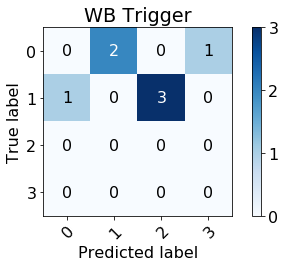

<class 'dict'>
watermark
=> watermark_val: 0.5714285714285714
Train on 15000 samples, validate on 10000 samples
Epoch 1/1
15000/15000 [==============================] - 27s 2ms/step - loss: 0.3368 - acc: 0.9599 - val_loss: 0.2406 - val_acc: 0.9242
=> Time: : 27.22643208503723
Confusion matrix, without normalization


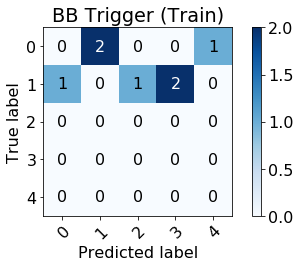

<class 'dict'>
watermark
=> watermark_val: 1.0
####################################################
Watermark retention BEFORE embeding new watermark...
7/7 [==============================] - 0s 570us/step
[2.9967706203460693, 0.0]
10000/10000 [==============================] - 5s 482us/step
[0.24058945965766906, 0.9242]
####################################################
[1 1 0 0 0 0 1 0 1 1]
[0 1 6 8 9]
[2 3 4 5 7]
[9, 9, 8, 4, 3, 0, 1, 5, 0, 5, 2, 6, 0, 2, 8, 9, 6, 1, 9, 3, 0, 1, 3, 3, 7, 3, 2, 0, 2, 5, 1, 2, 1, 7, 4, 2, 4, 4, 5, 9, 0, 1, 6, 3, 7, 3, 0, 5, 6, 6, 4, 7, 9, 4, 8, 0, 9, 8, 5, 1, 6, 0, 6, 7, 6, 0, 6, 4, 2, 2, 0, 7, 1, 2, 7, 9, 8, 1, 9, 6, 3, 8, 9, 4, 8, 7, 8, 5, 4, 5, 1, 8, 5, 1, 0, 7, 4, 7, 7, 4, 5, 5, 7, 4, 7, 0, 3, 0, 6, 2, 7, 7, 9, 0, 3, 2, 7, 5, 2, 7, 1, 2, 6, 4, 9, 6, 2, 7, 3, 3, 1, 0, 1, 0, 6, 5, 9, 7, 7, 7, 4, 2, 2, 5, 7, 3, 7, 9, 7, 5, 2, 1, 7, 0, 6, 3, 5, 4, 4, 3, 3, 4, 5, 7, 6, 5, 9, 8, 7, 2, 2, 4, 7, 2, 1, 6, 3, 5, 2, 2, 0, 7, 3, 4, 0, 7, 0, 3, 1, 7, 9, 8, 4

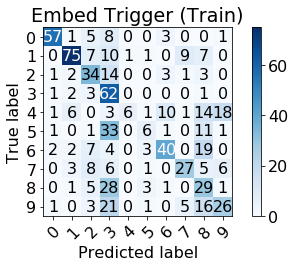

=> watermark_val: 0.5171428566319601
[  0   1   2   3   4   7   9  12  13  24  25  27  29  31  32  35  40  43
  45  46  48  50  56  62  63  64  67  71  72  73  74  75  84  88  89  93
  96  97  98 100 103 104 105 107 115 117 119 120 126 129 131 133 136 137
 138 140 145 146 148 150 152 158 161 162 163 168 171 175 176 179 187 190
 193 199 200 201 205 206 207 208 209 211 213 218 221 223 224 225 226 227
 229 231 232 235 236 238 239 240 241 244 248 251 254 255 256 257 259 263
 265 270 274 275 279 281 282 284 289 292 295 300 301 302 303 304 305 306
 307 314 318 319 324 325 328 332 336 337 340 345 349 354 362 363 364 366
 368 369 370 372 375 376 377 378 379 381 385 386 387 389 391 392 394 395
 398 399 400 404 408 409 411 413 415 417 419 423 424 426 429 431 436 439
 444 445 455 467 468 469 471 473 480 484 485 486 491 500 501 505 510 511
 519 520 524 526 532 534 535 537 539 540 545 546 548 551 556 557 559 562
 563 564 565 567 571 574 578 580 581 582 586 587 589 591 592 601 602 605
 606 607 608 6

In [4]:
blackmarks_embed_fn = blackmarks_embed(np.array([1, 0, 1, 0, 0, 1, 1]))
surr_model, all_history = adversarial_whitebox(
     load_dataset_func=load_mnist_images,  # Which dataset to choose. Should return training and testing data
     dataset_label="MNIST",  # Label of the dataset (for caching)
     load_wm_model_func=get_lenet_model_for_mnist,  # Model specification for wm_embedding
     wm_embed_func=blackmarks_embed_fn,
     cluster=True # Set to true when using blackmarks
)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val', 'time', 'time_total'])


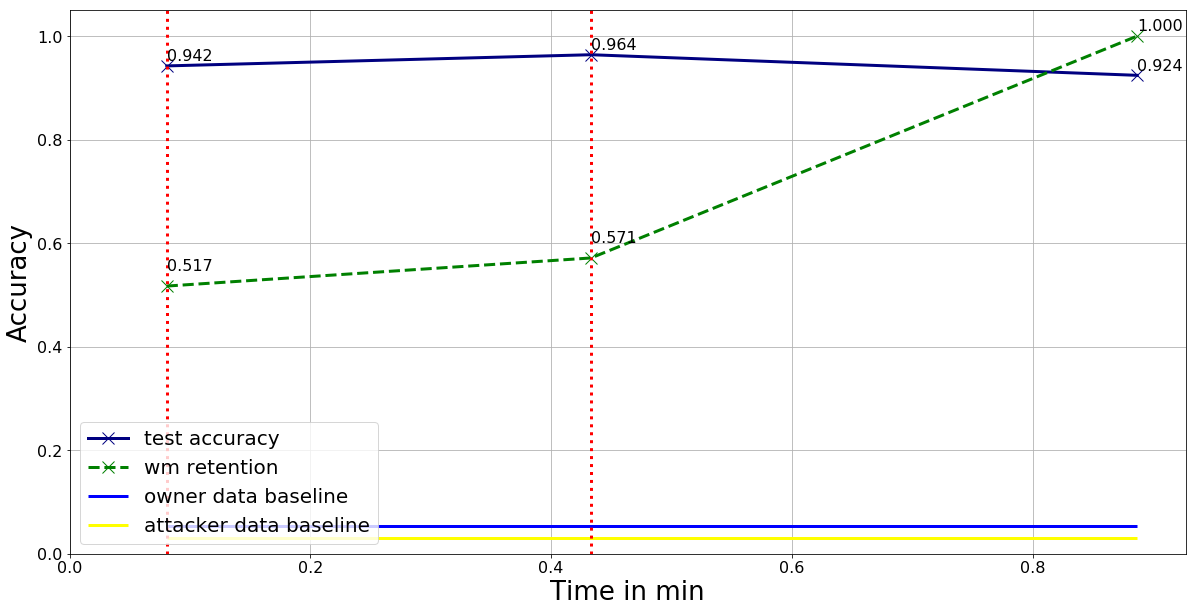

In [5]:
plot_whitebox(all_history, blackbox_surr_val_acc=0.987)

### 1. Watermark, Blackbox, Watermark

#### Watermark retention BEFORE embeding new watermark

Trigger Dataset Accuracy: 60%

Test Dataset Accuracy: 97.94%

#### Watermark retention AFTER embeding new watermark

Trigger Dataset Accuracy: 71%

Test Dataset Accuracy: 98.1%